<a href="https://colab.research.google.com/github/ashu131998/Customer-churn-prediction-using-machine-learning/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [0]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
df = df.dropna(how="all") # remove samples with all missing values
df = df[~df.duplicated()] # remove duplicates
total_charges_filter = df.TotalCharges == " "
df = df[~total_charges_filter]
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [0]:
categorical_features = [
 "gender",
 "SeniorCitizen",
 "Partner",
 "Dependents",
 "PhoneService",
 "MultipleLines",
 "InternetService",
 "OnlineSecurity",
 "OnlineBackup",
 "DeviceProtection",
 "TechSupport",
 "StreamingTV",
 "StreamingMovies",
 "Contract",
 "PaperlessBilling",
 "PaymentMethod",
]
numerical_features = [ "MonthlyCharges","tenure", "TotalCharges"]
target = "Churn"

In [0]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f75c54b38>,
      dtype=object)

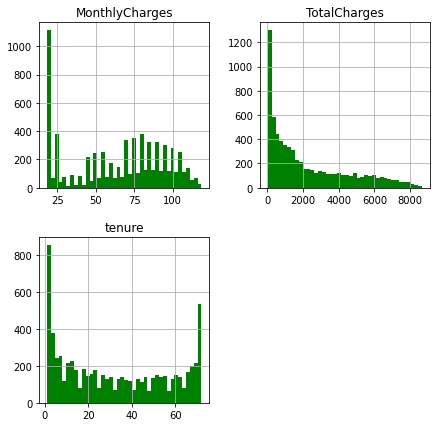

In [0]:
df[numerical_features].hist(bins=40, figsize=(7,7 ),color="green")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f75a74cc0>,
      dtype=object)

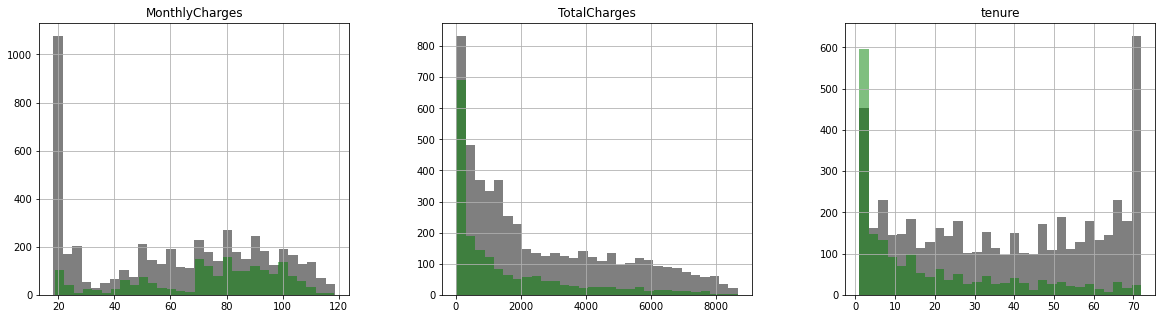

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="black", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="green", alpha=0.5, ax=ax)

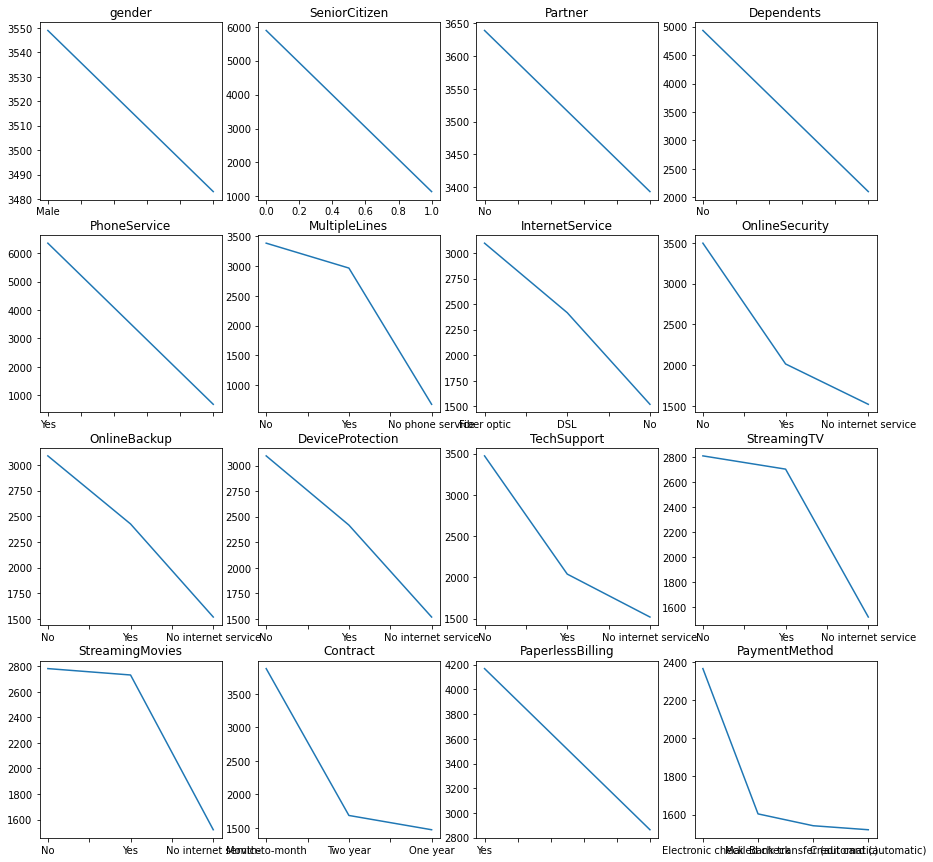

In [0]:
ROWS, COLS = 4, 4

fig, ax = plt.subplots(ROWS, COLS, figsize=(15,15))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(x='bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

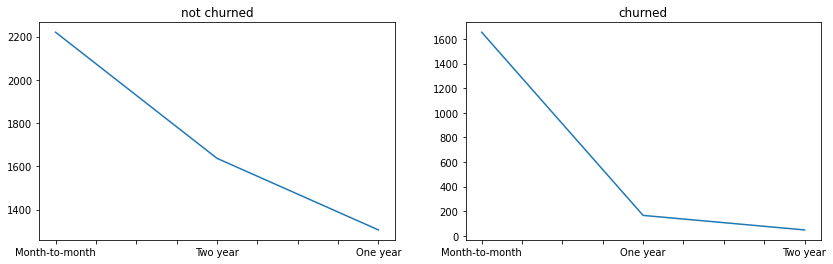

In [0]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.Churn == "No"][feature].value_counts().plot(x='bar' ,ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(x='bar' ,ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

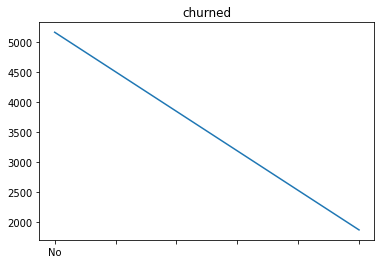

In [0]:
df[target].value_counts().plot(x='bar').set_title('churned')

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
from sklearn import tree

clf = Pipeline([
     ('preprocessor', preprocessor),
     ('clf', tree.DecisionTreeClassifier(max_depth=3,random_state=42))
])

In [0]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42)
clf.fit(df_train, df_train[target])
pred = clf.predict(df_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(df_test[target], pred))

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      1300
         Yes       0.67      0.37      0.48       458

    accuracy                           0.79      1758
   macro avg       0.74      0.65      0.67      1758
weighted avg       0.77      0.79      0.77      1758

